In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,VotingRegressor,StackingRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
from xgboost import XGBRegressor

# DATA SET

In [2]:
df=pd.read_csv('Walmart.csv')
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [59]:
df['Holiday_Flag'].unique()

array([0, 1], dtype=int64)

# DESCRIBTIVE ANALYSIS

In [3]:
# Convert 'Date' column to datetime format with the correct format specified
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract weekday, month, and year features
df['weekday'] = df['Date'].dt.weekday
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

# Drop the 'Date' column
df.drop(['Date'], axis=1, inplace=True)

# Define target and features
target = 'Weekly_Sales'
features = [col for col in df.columns if col != target]

# Display the head of the dataframe
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,2010


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01
weekday,6435.0,4.000000e+00,0.000000,4.000,4.000,4.000000,4.000000e+00,4.000000e+00
month,6435.0,6.447552e+00,3.238308,1.000,4.000,6.000000,9.000000e+00,1.200000e+01
year,6435.0,2.010965e+03,0.797019,2010.000,2010.000,2011.000000,2.012000e+03,2.012000e+03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   weekday       6435 non-null   int32  
 8   month         6435 non-null   int32  
 9   year          6435 non-null   int32  
dtypes: float64(5), int32(3), int64(2)
memory usage: 427.5 KB


In [6]:
df.nunique().sort_values()

weekday            1
Holiday_Flag       2
year               3
month             12
Store             45
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

# UNIVARIANTE ANALYSIS

In [7]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'weekday', 'month', 'year'],
      dtype='object')

In [8]:
df_num=df[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']]

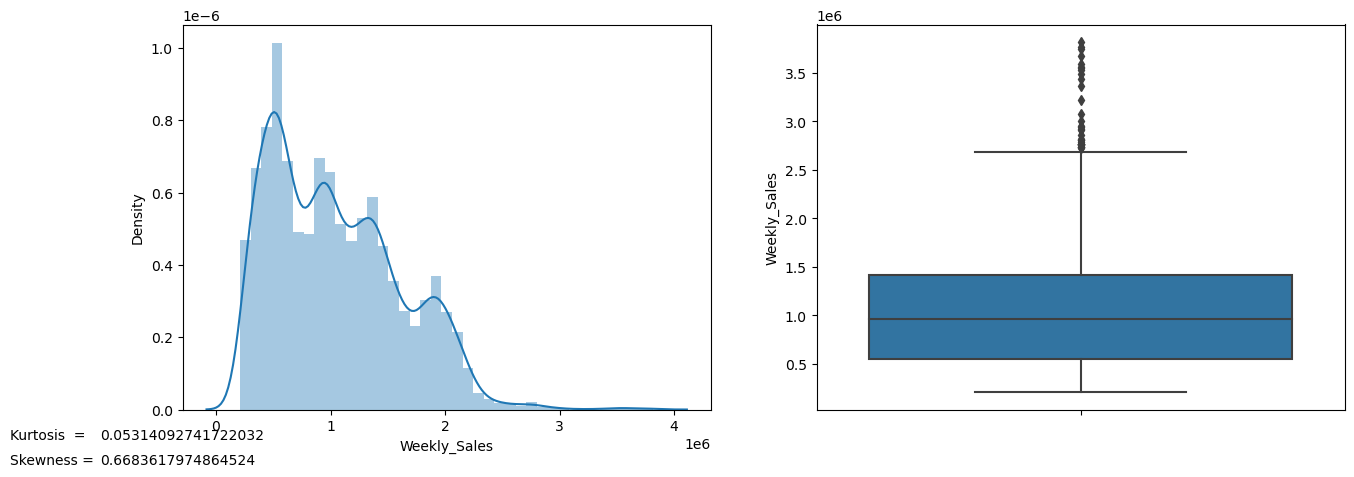

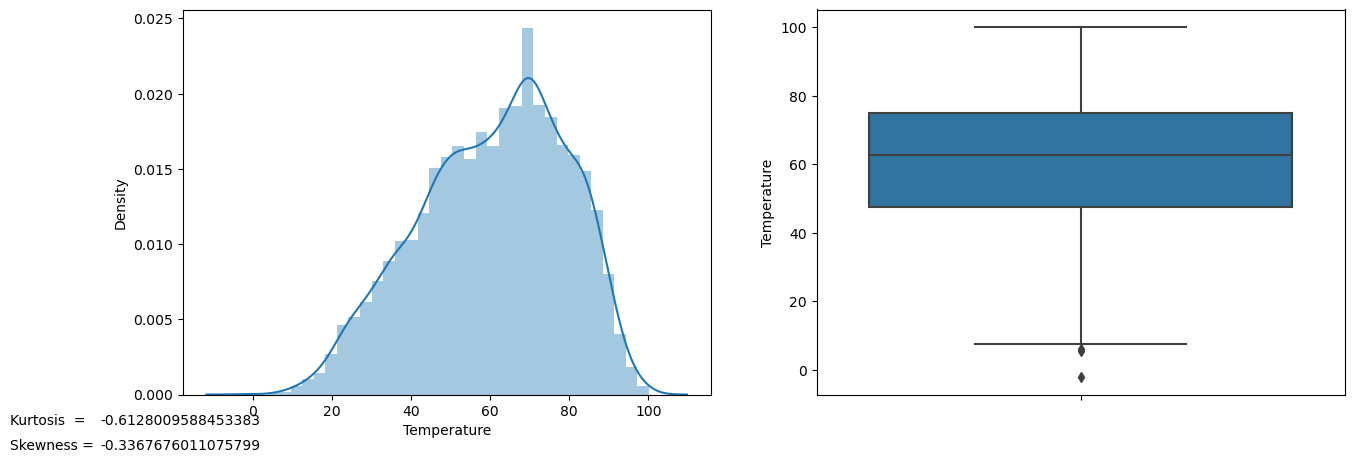

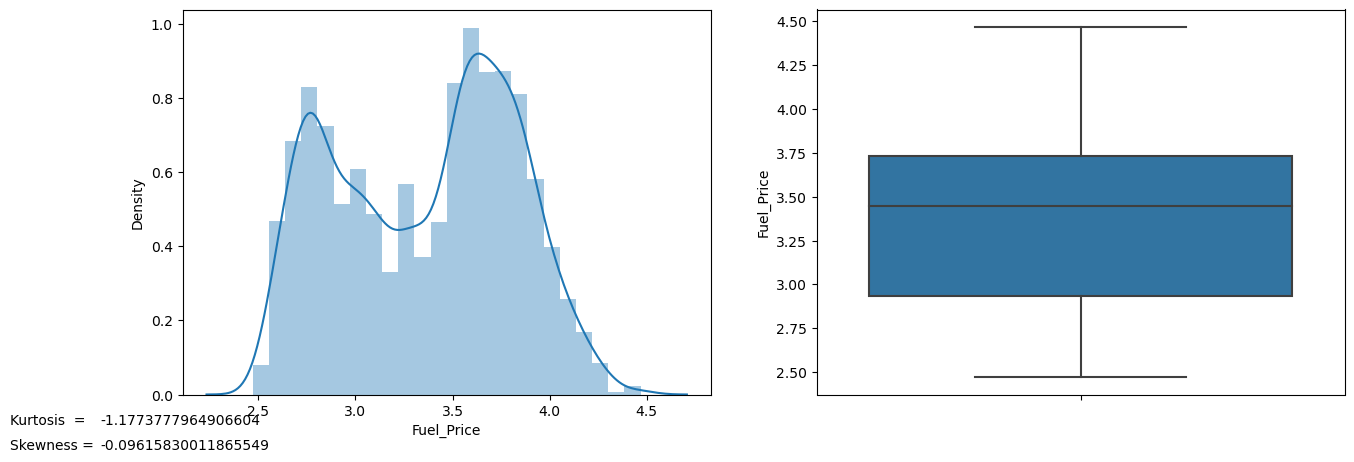

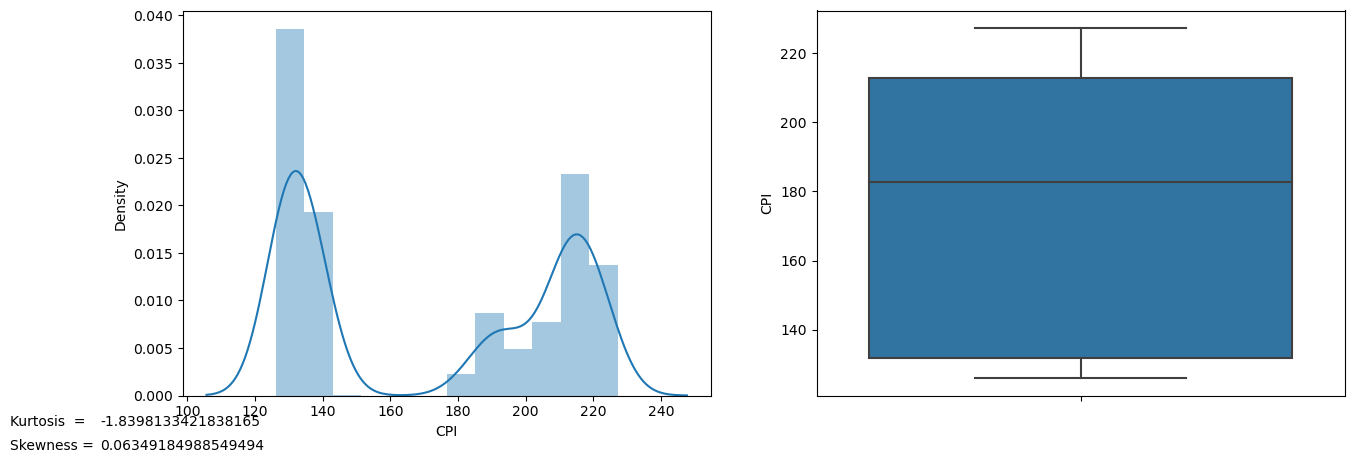

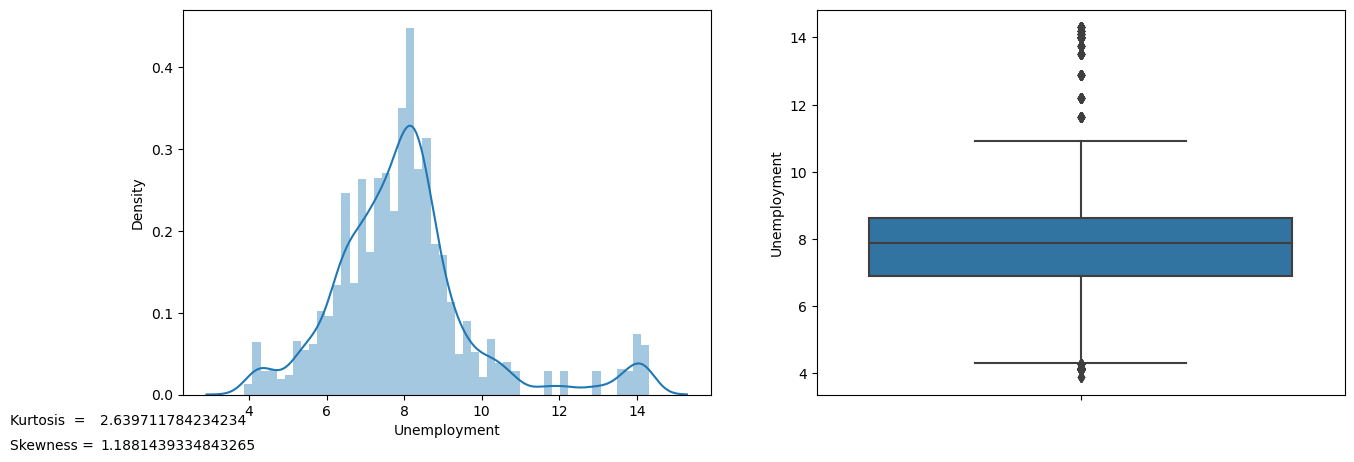

In [9]:
for i in df_num.columns:
    plt.subplots(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.distplot(df_num[i])
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_num[i])
    plt.figtext(0.01,0.001, 'Skewness = ')
    plt.figtext(0.07,0.001, df_num[i].skew())
    plt.figtext(0.01,0.05, 'Kurtosis  =')
    plt.figtext(0.07,0.05, df_num[i].kurt())
    plt.show()

In [10]:
df_cat=df[['Store', 'Holiday_Flag', 'month', 'year']]

Store


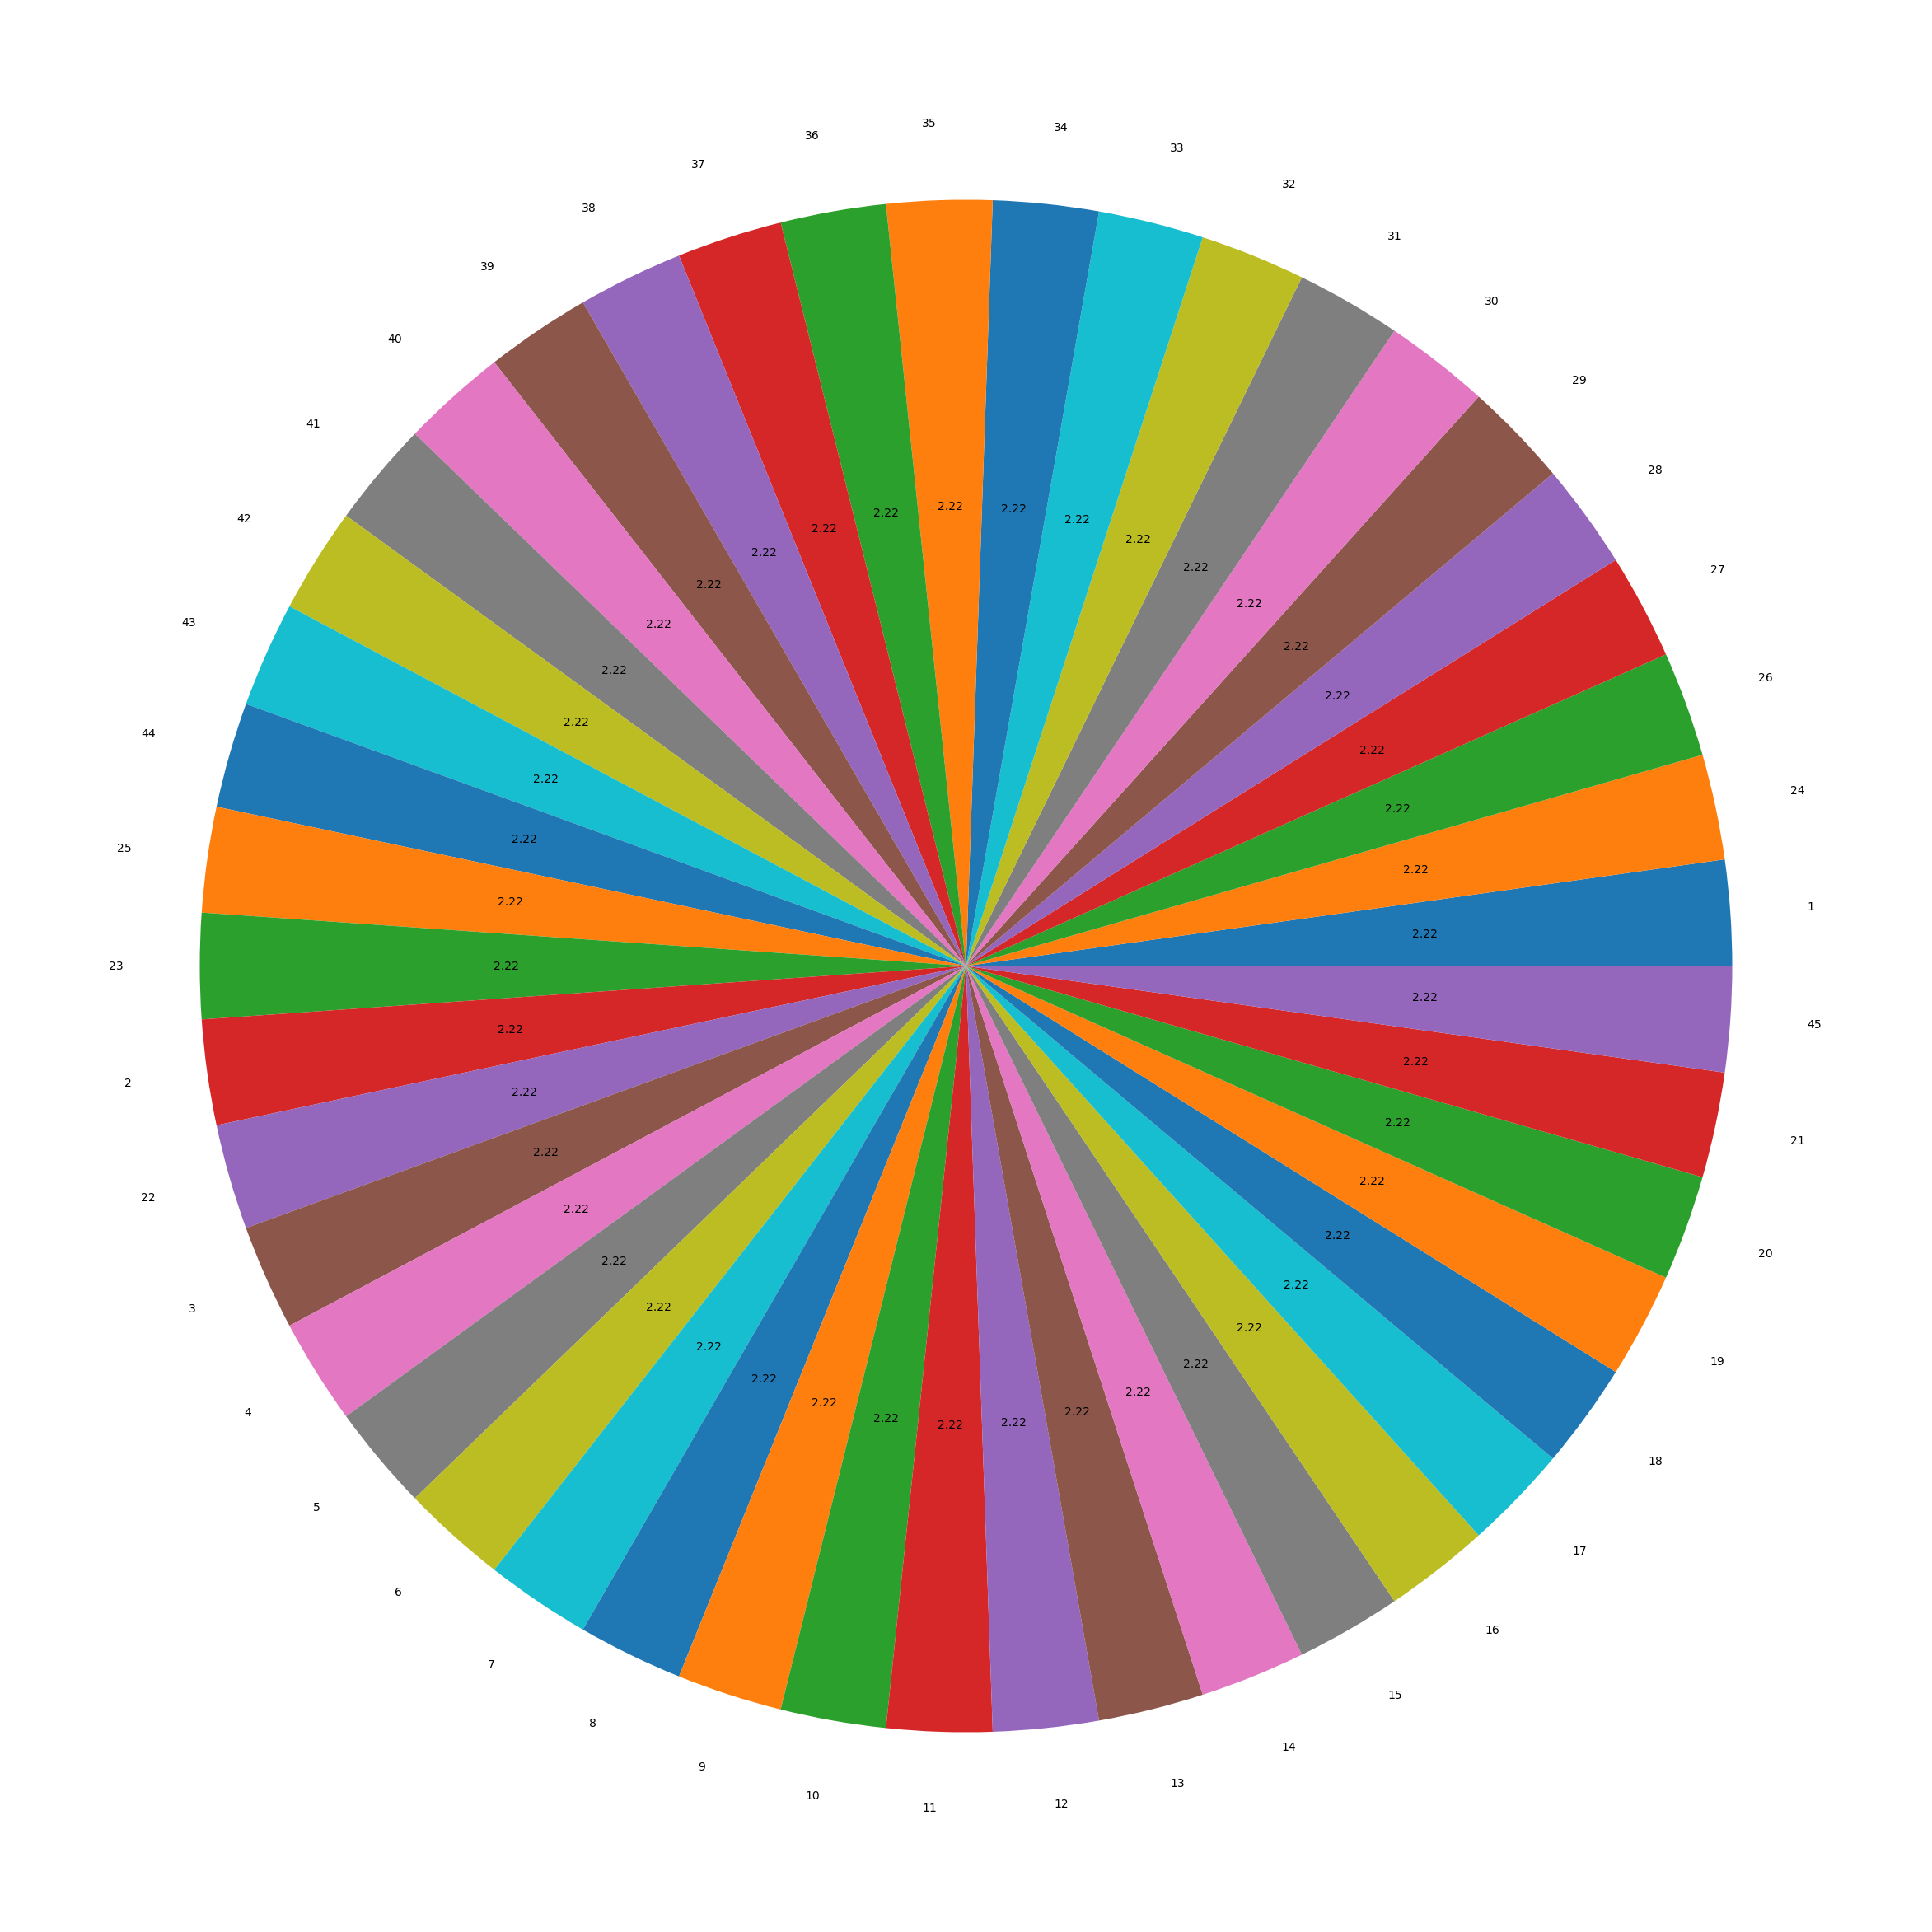

Holiday_Flag


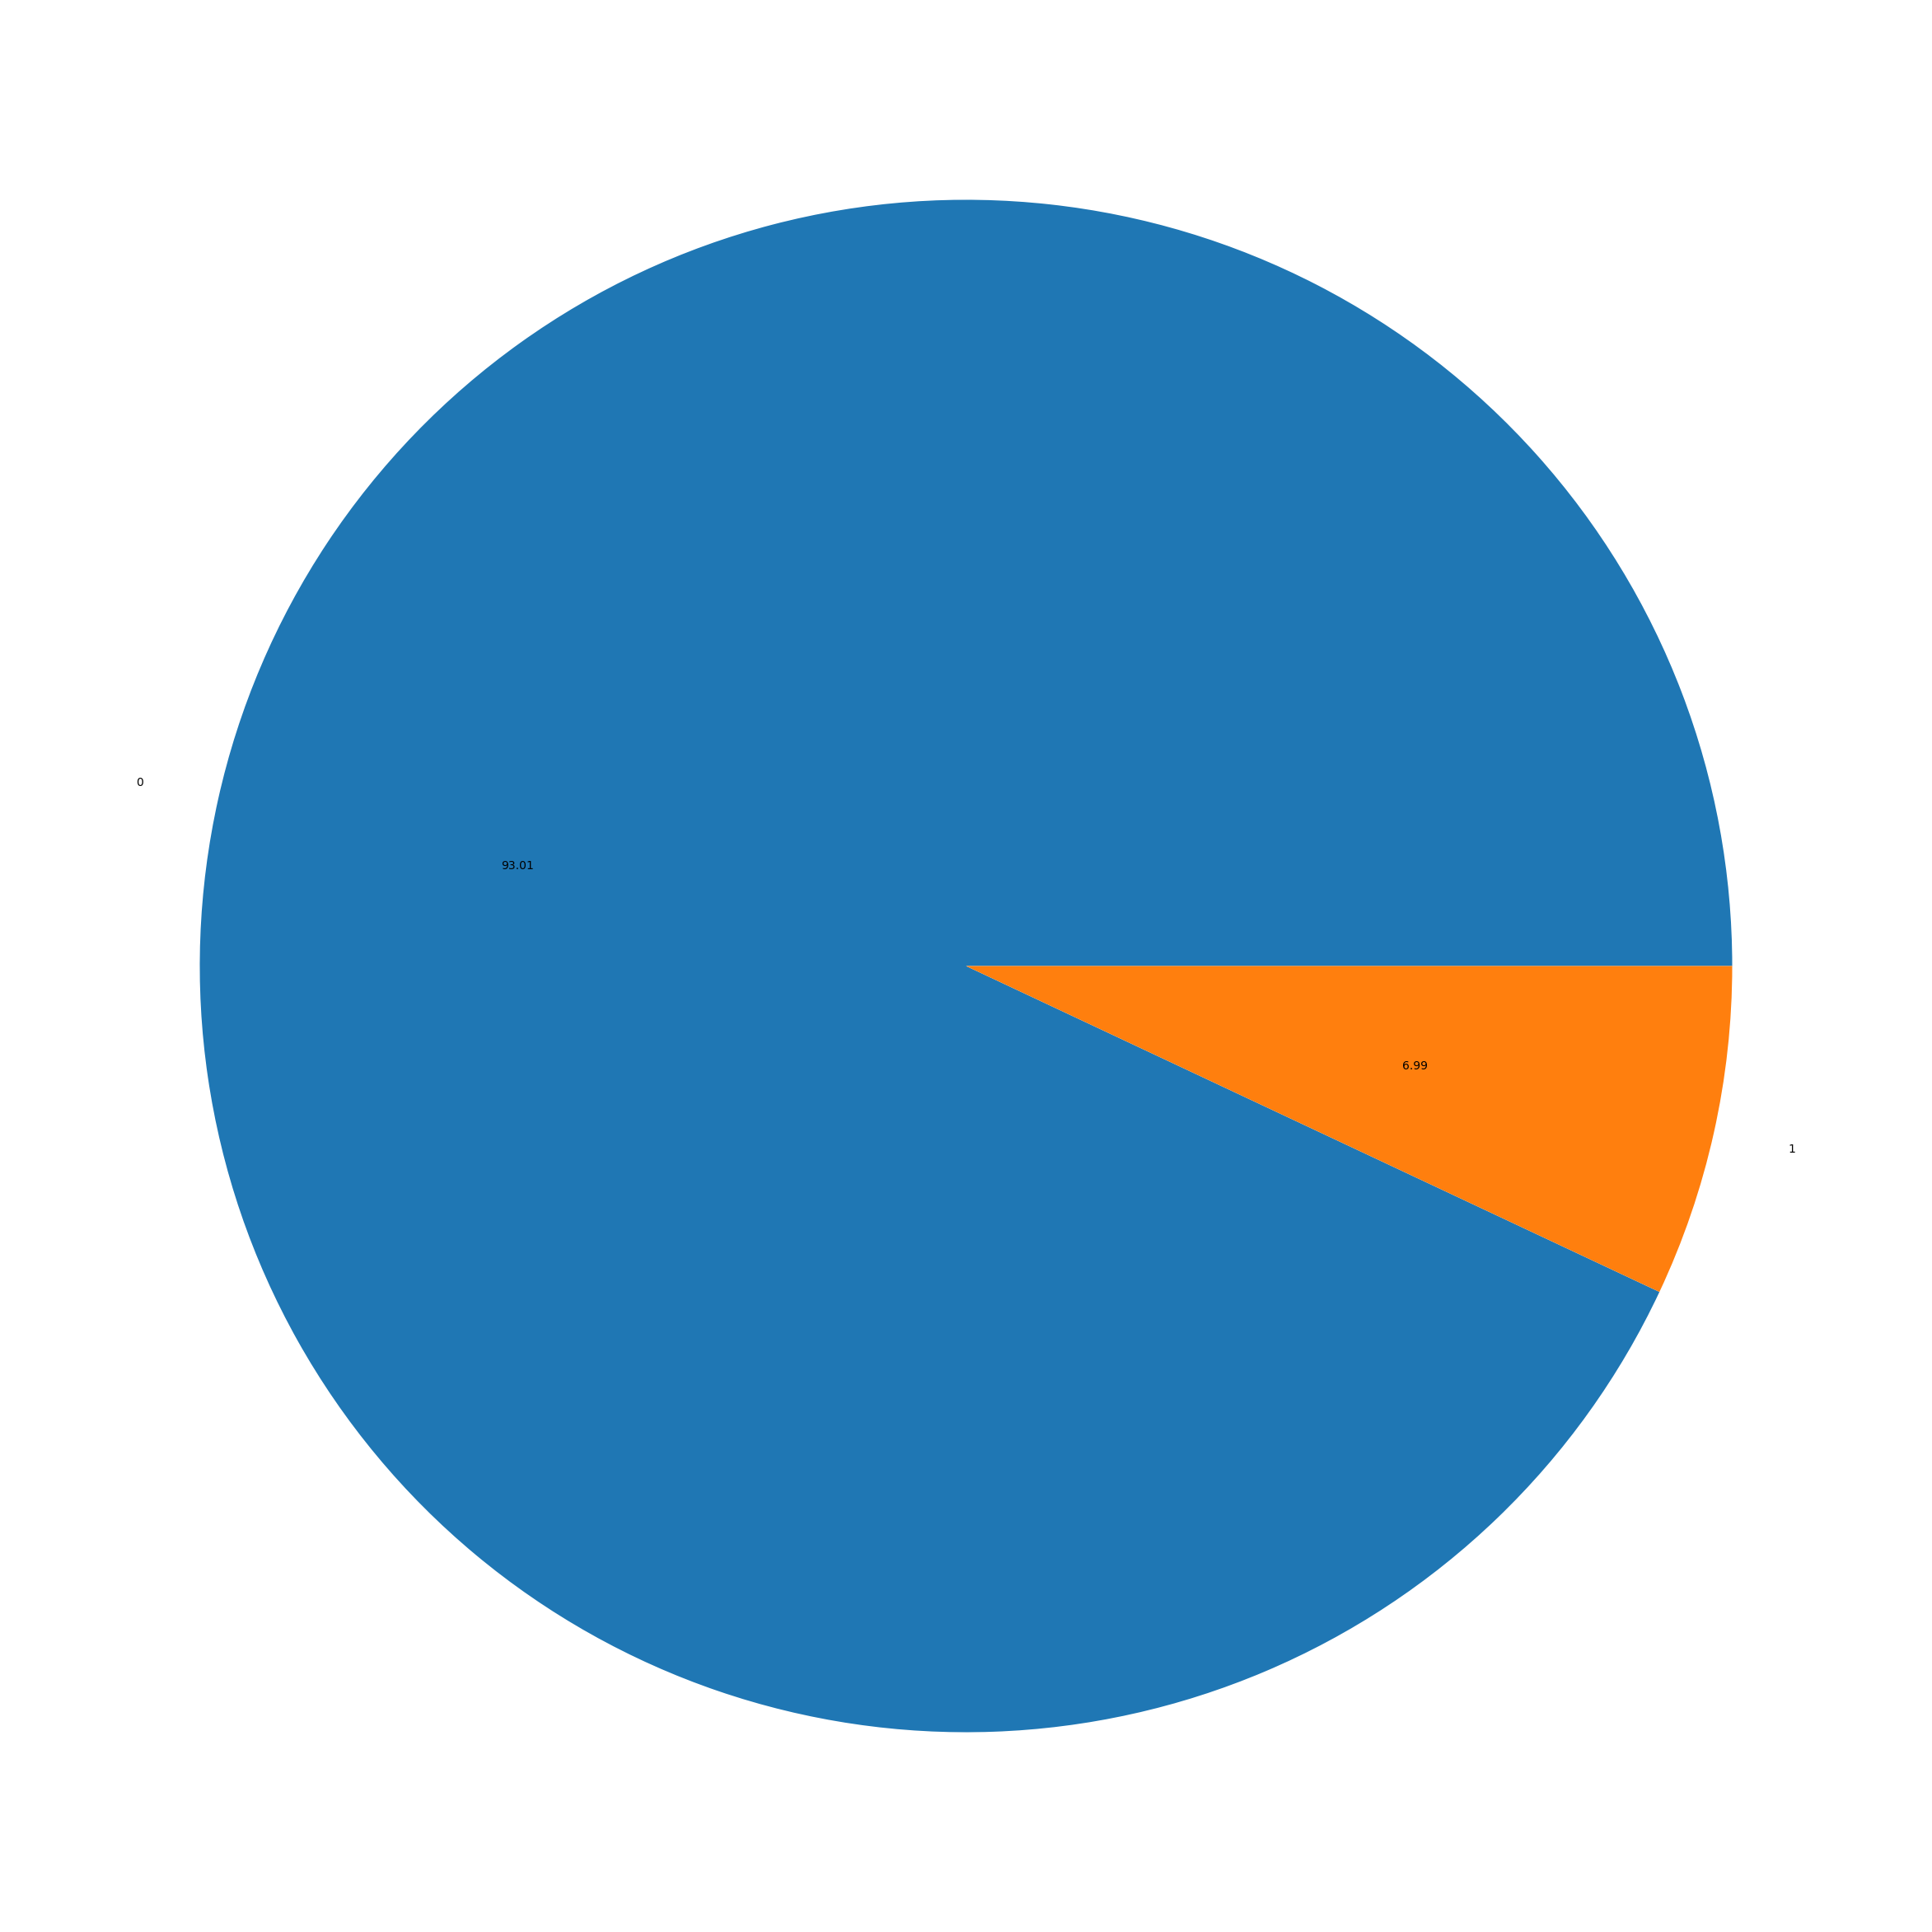

month


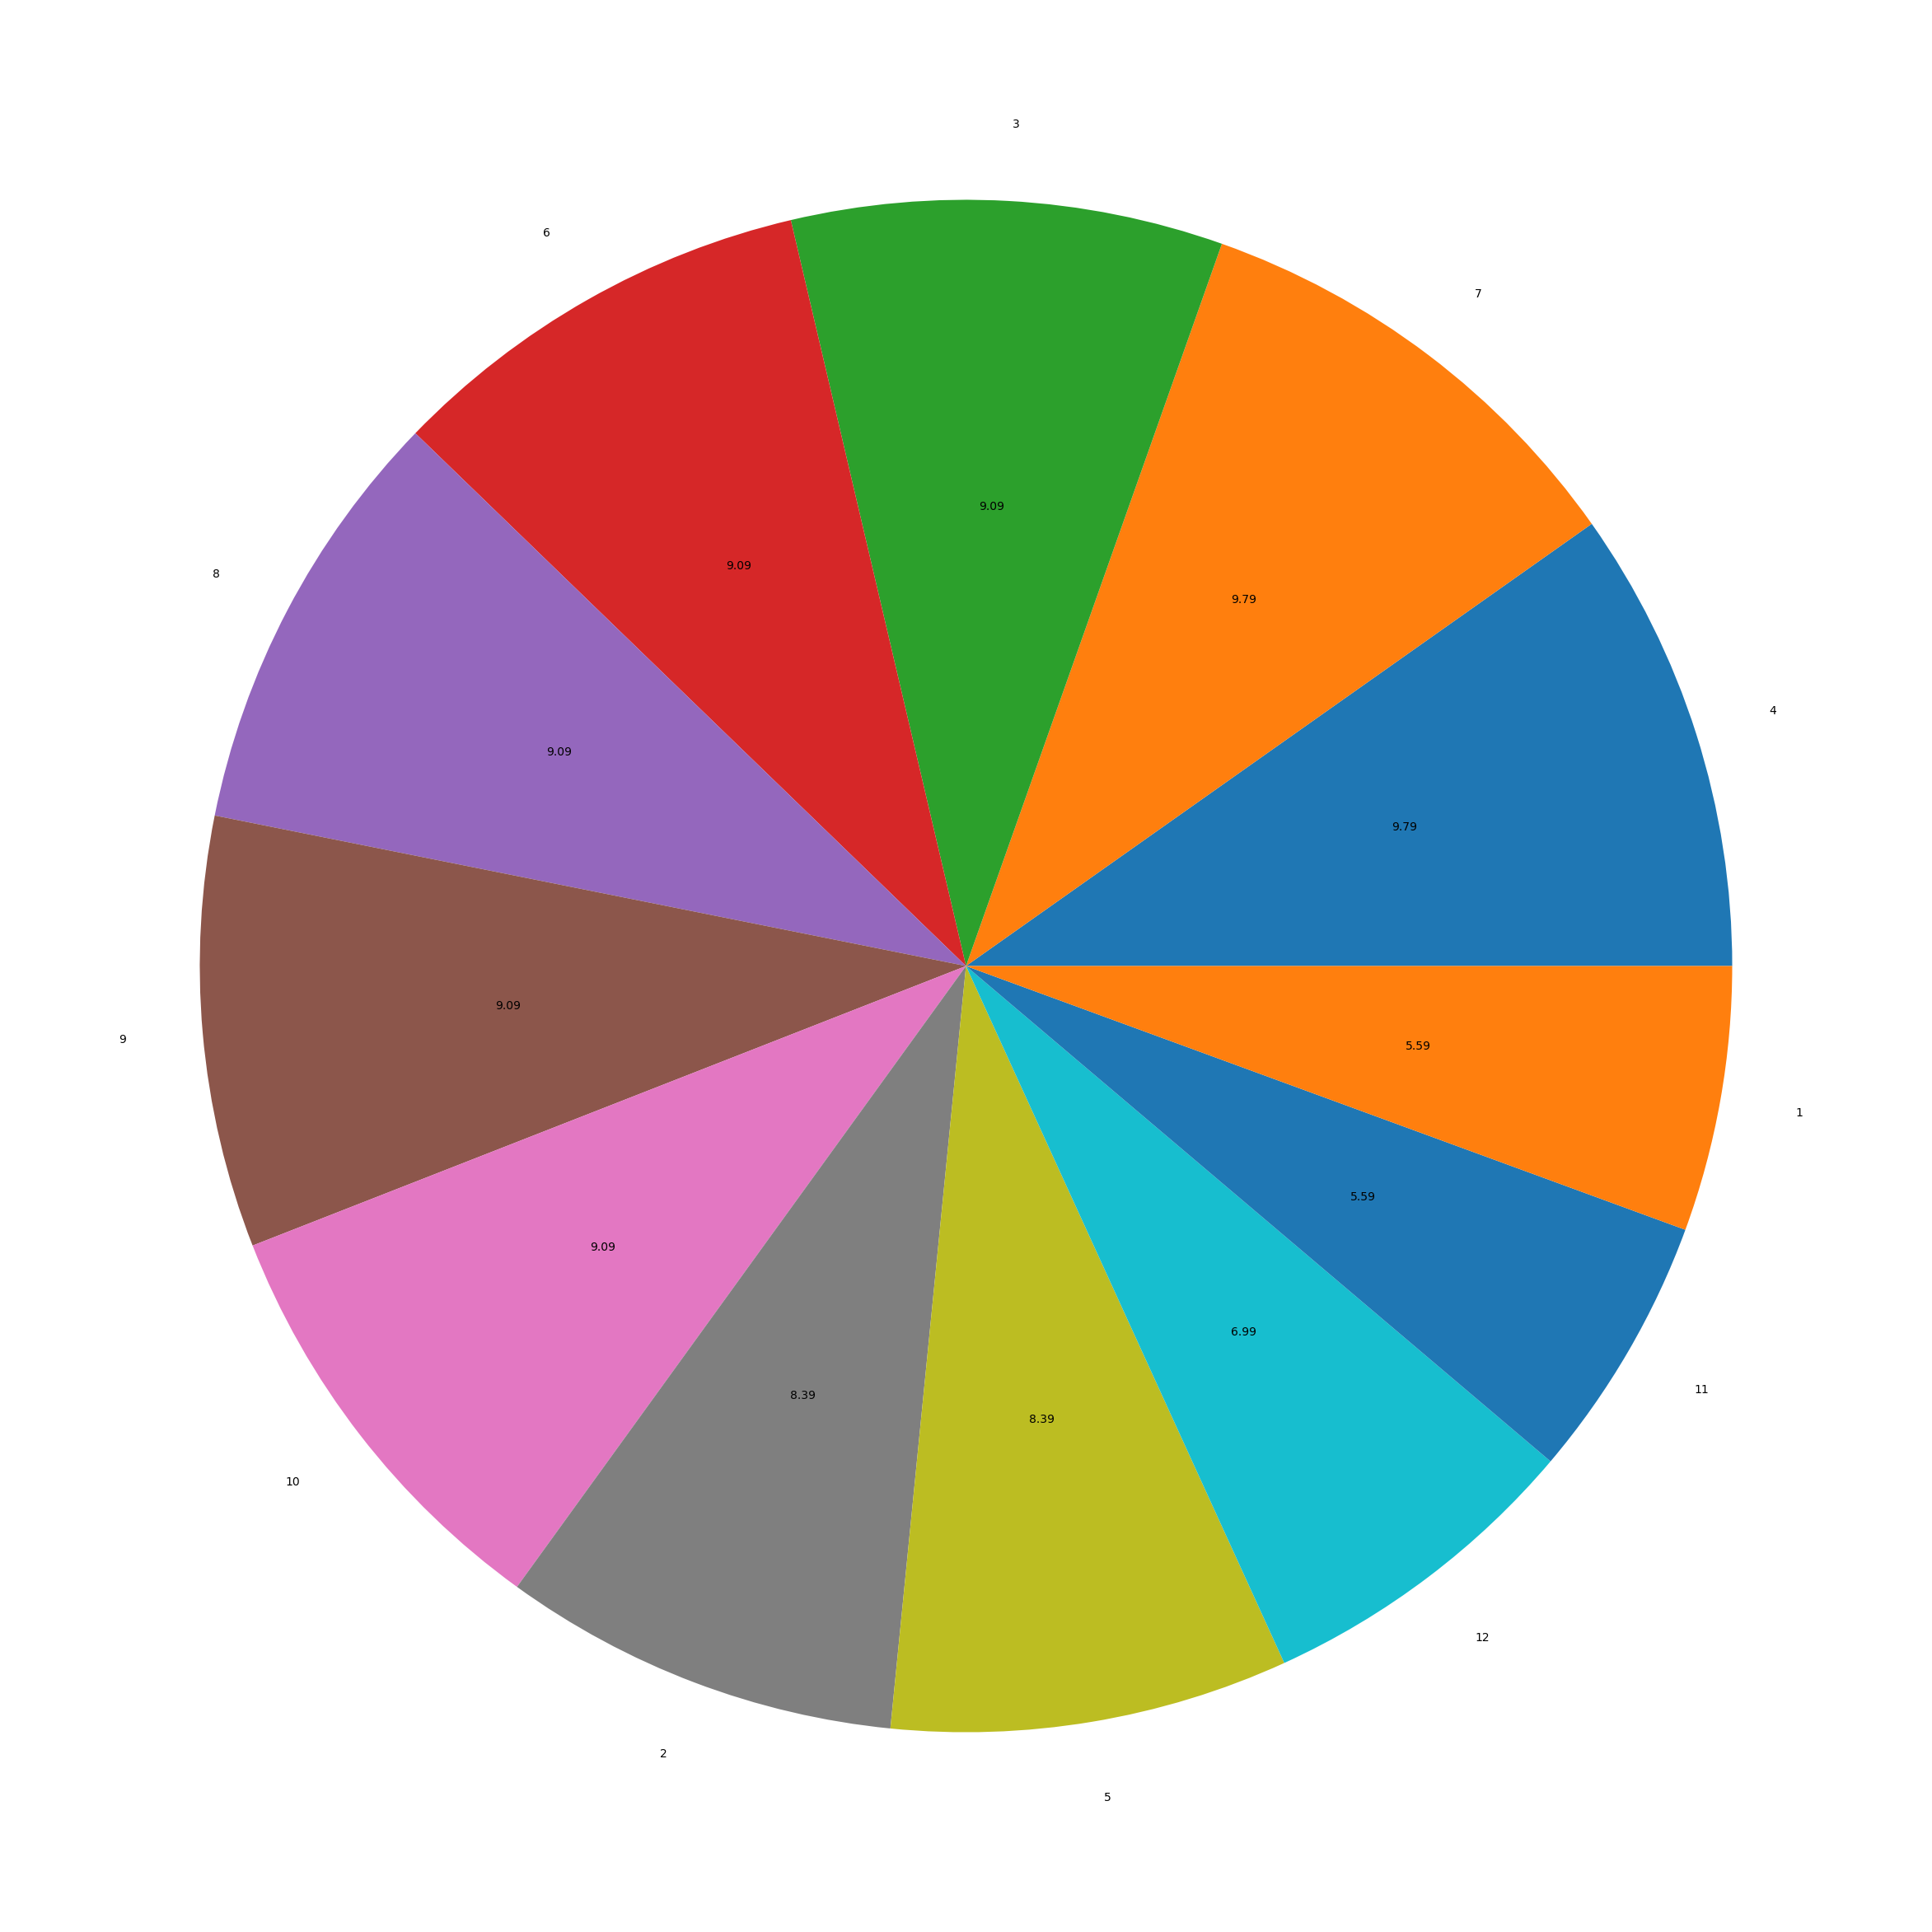

year


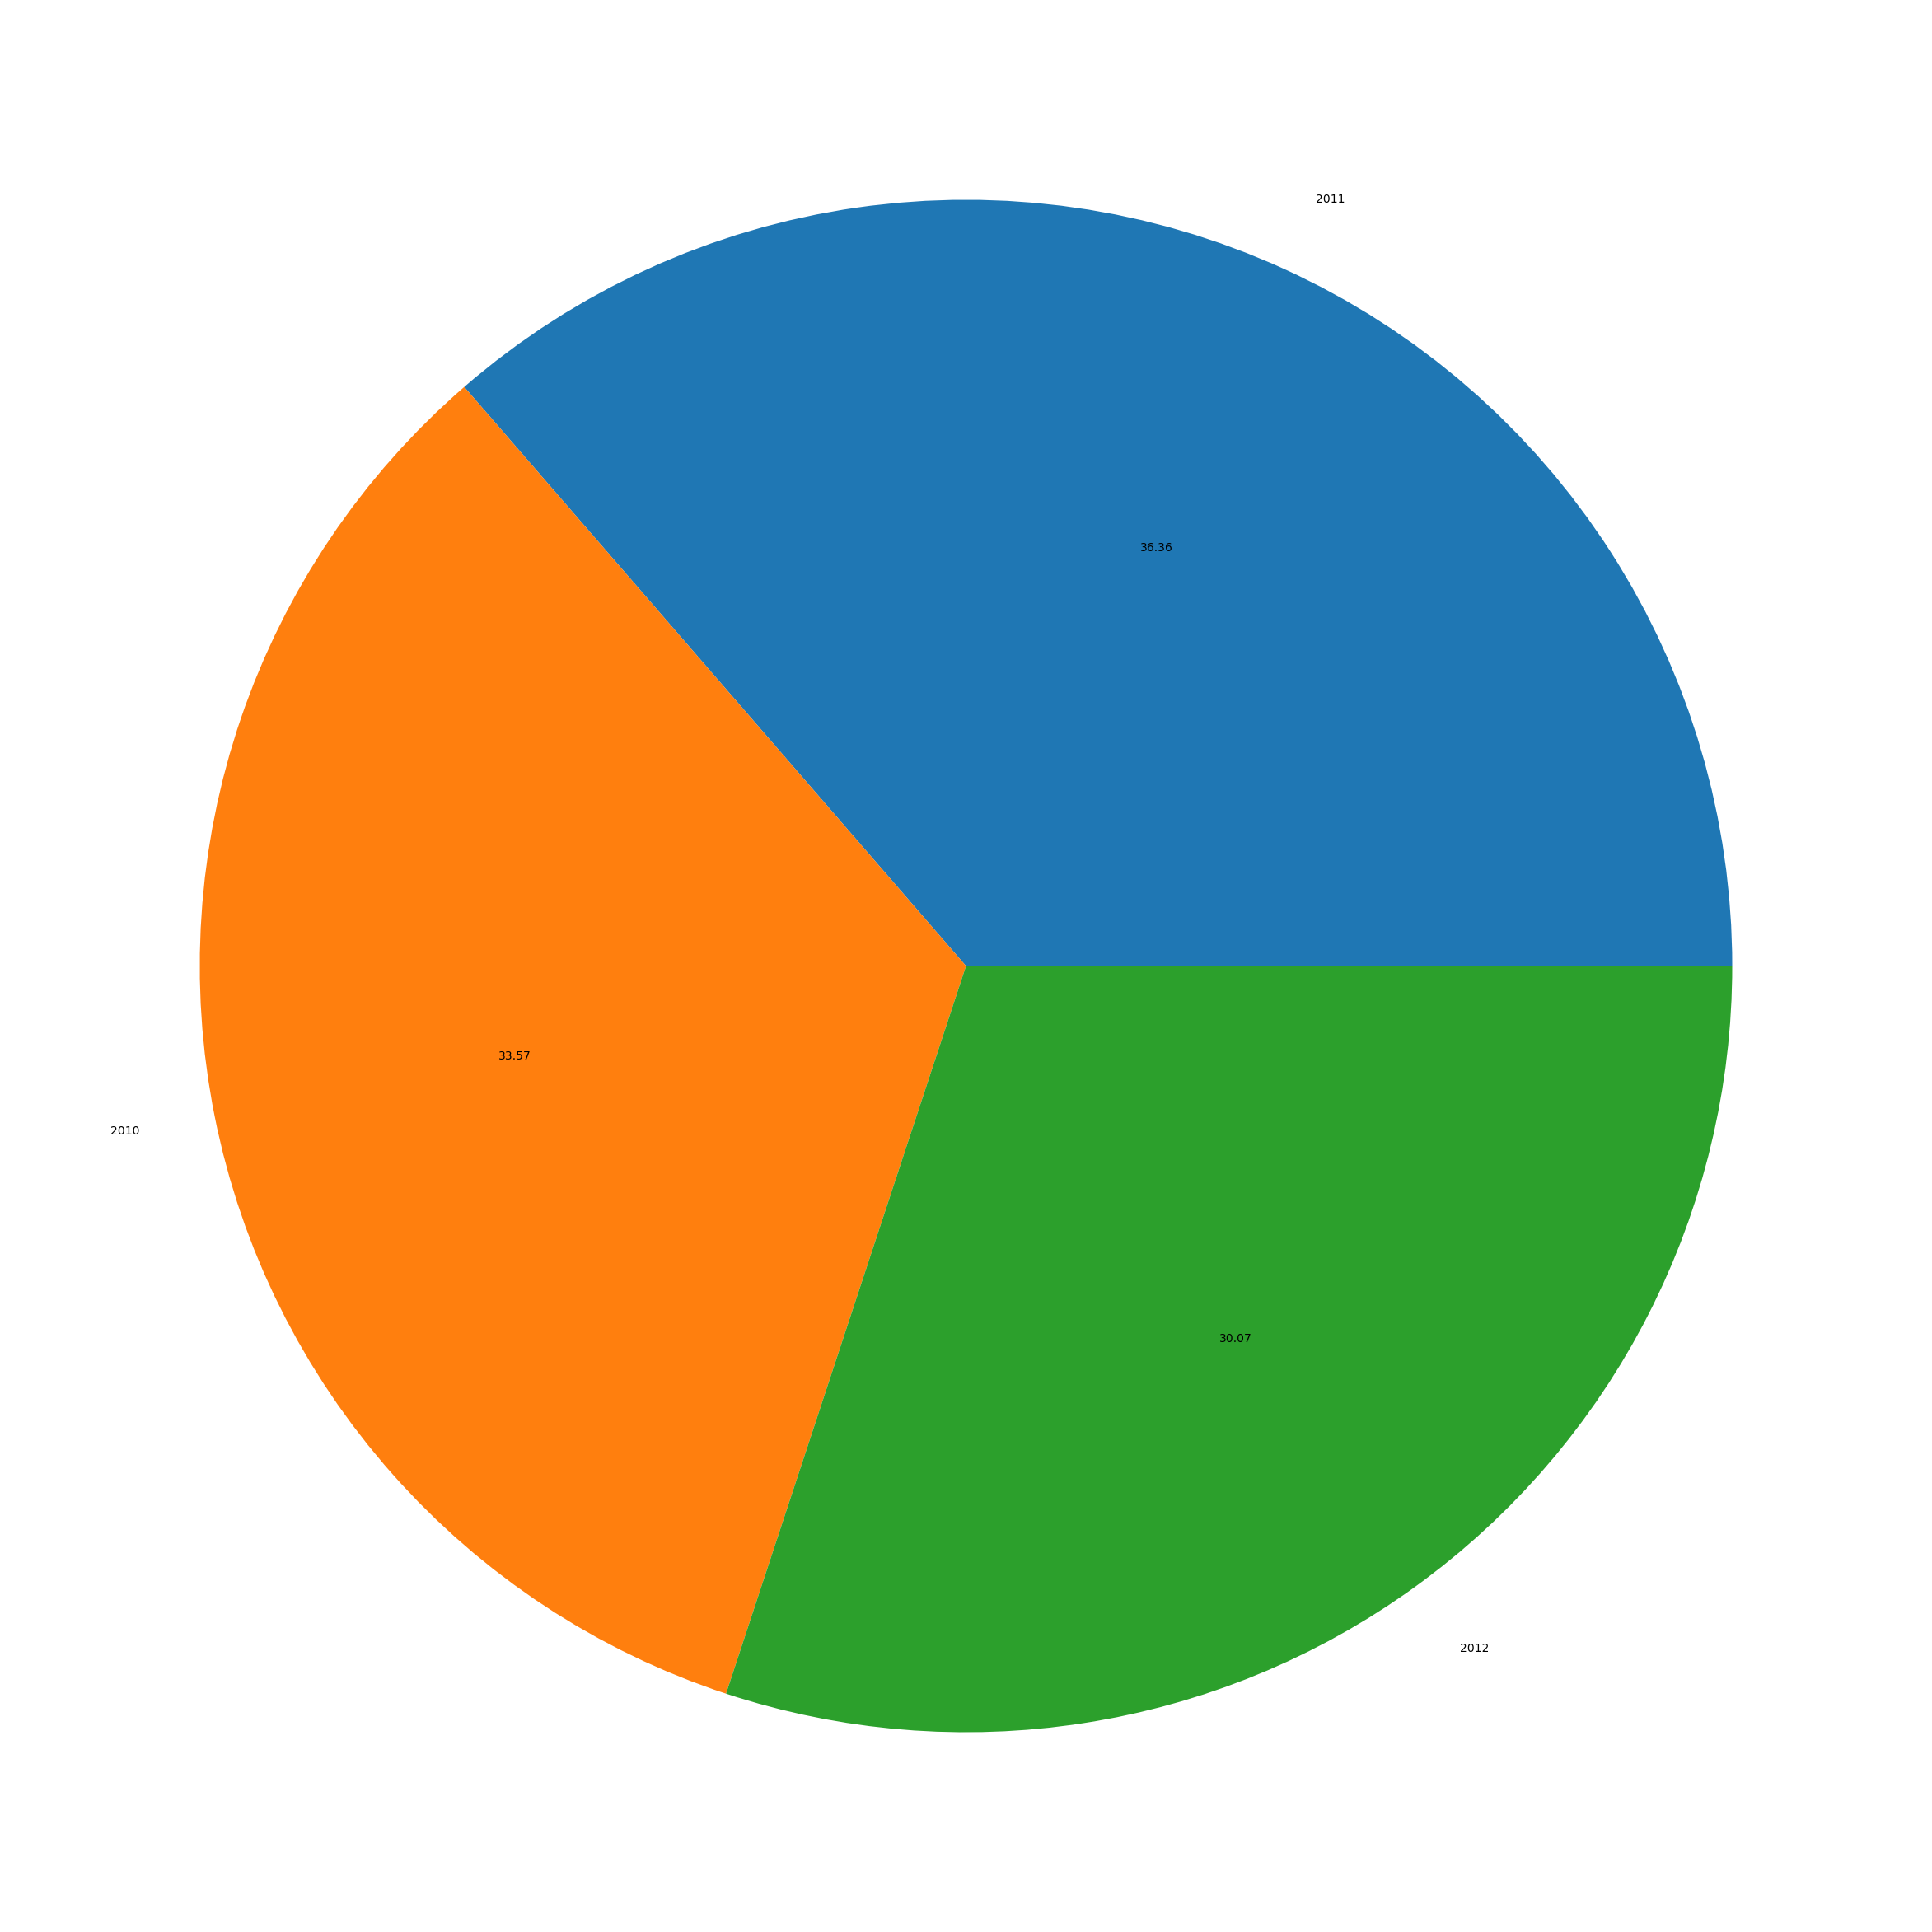

In [11]:
for i in df_cat:
    print(i)
    plt.figure(figsize=(30,40))
    z=df_cat[i].value_counts()/len(df_cat)*100
    plt.pie(z,autopct="%.2f",labels=z.index)
    plt.show()

# BIVARIANT ANALYSIS

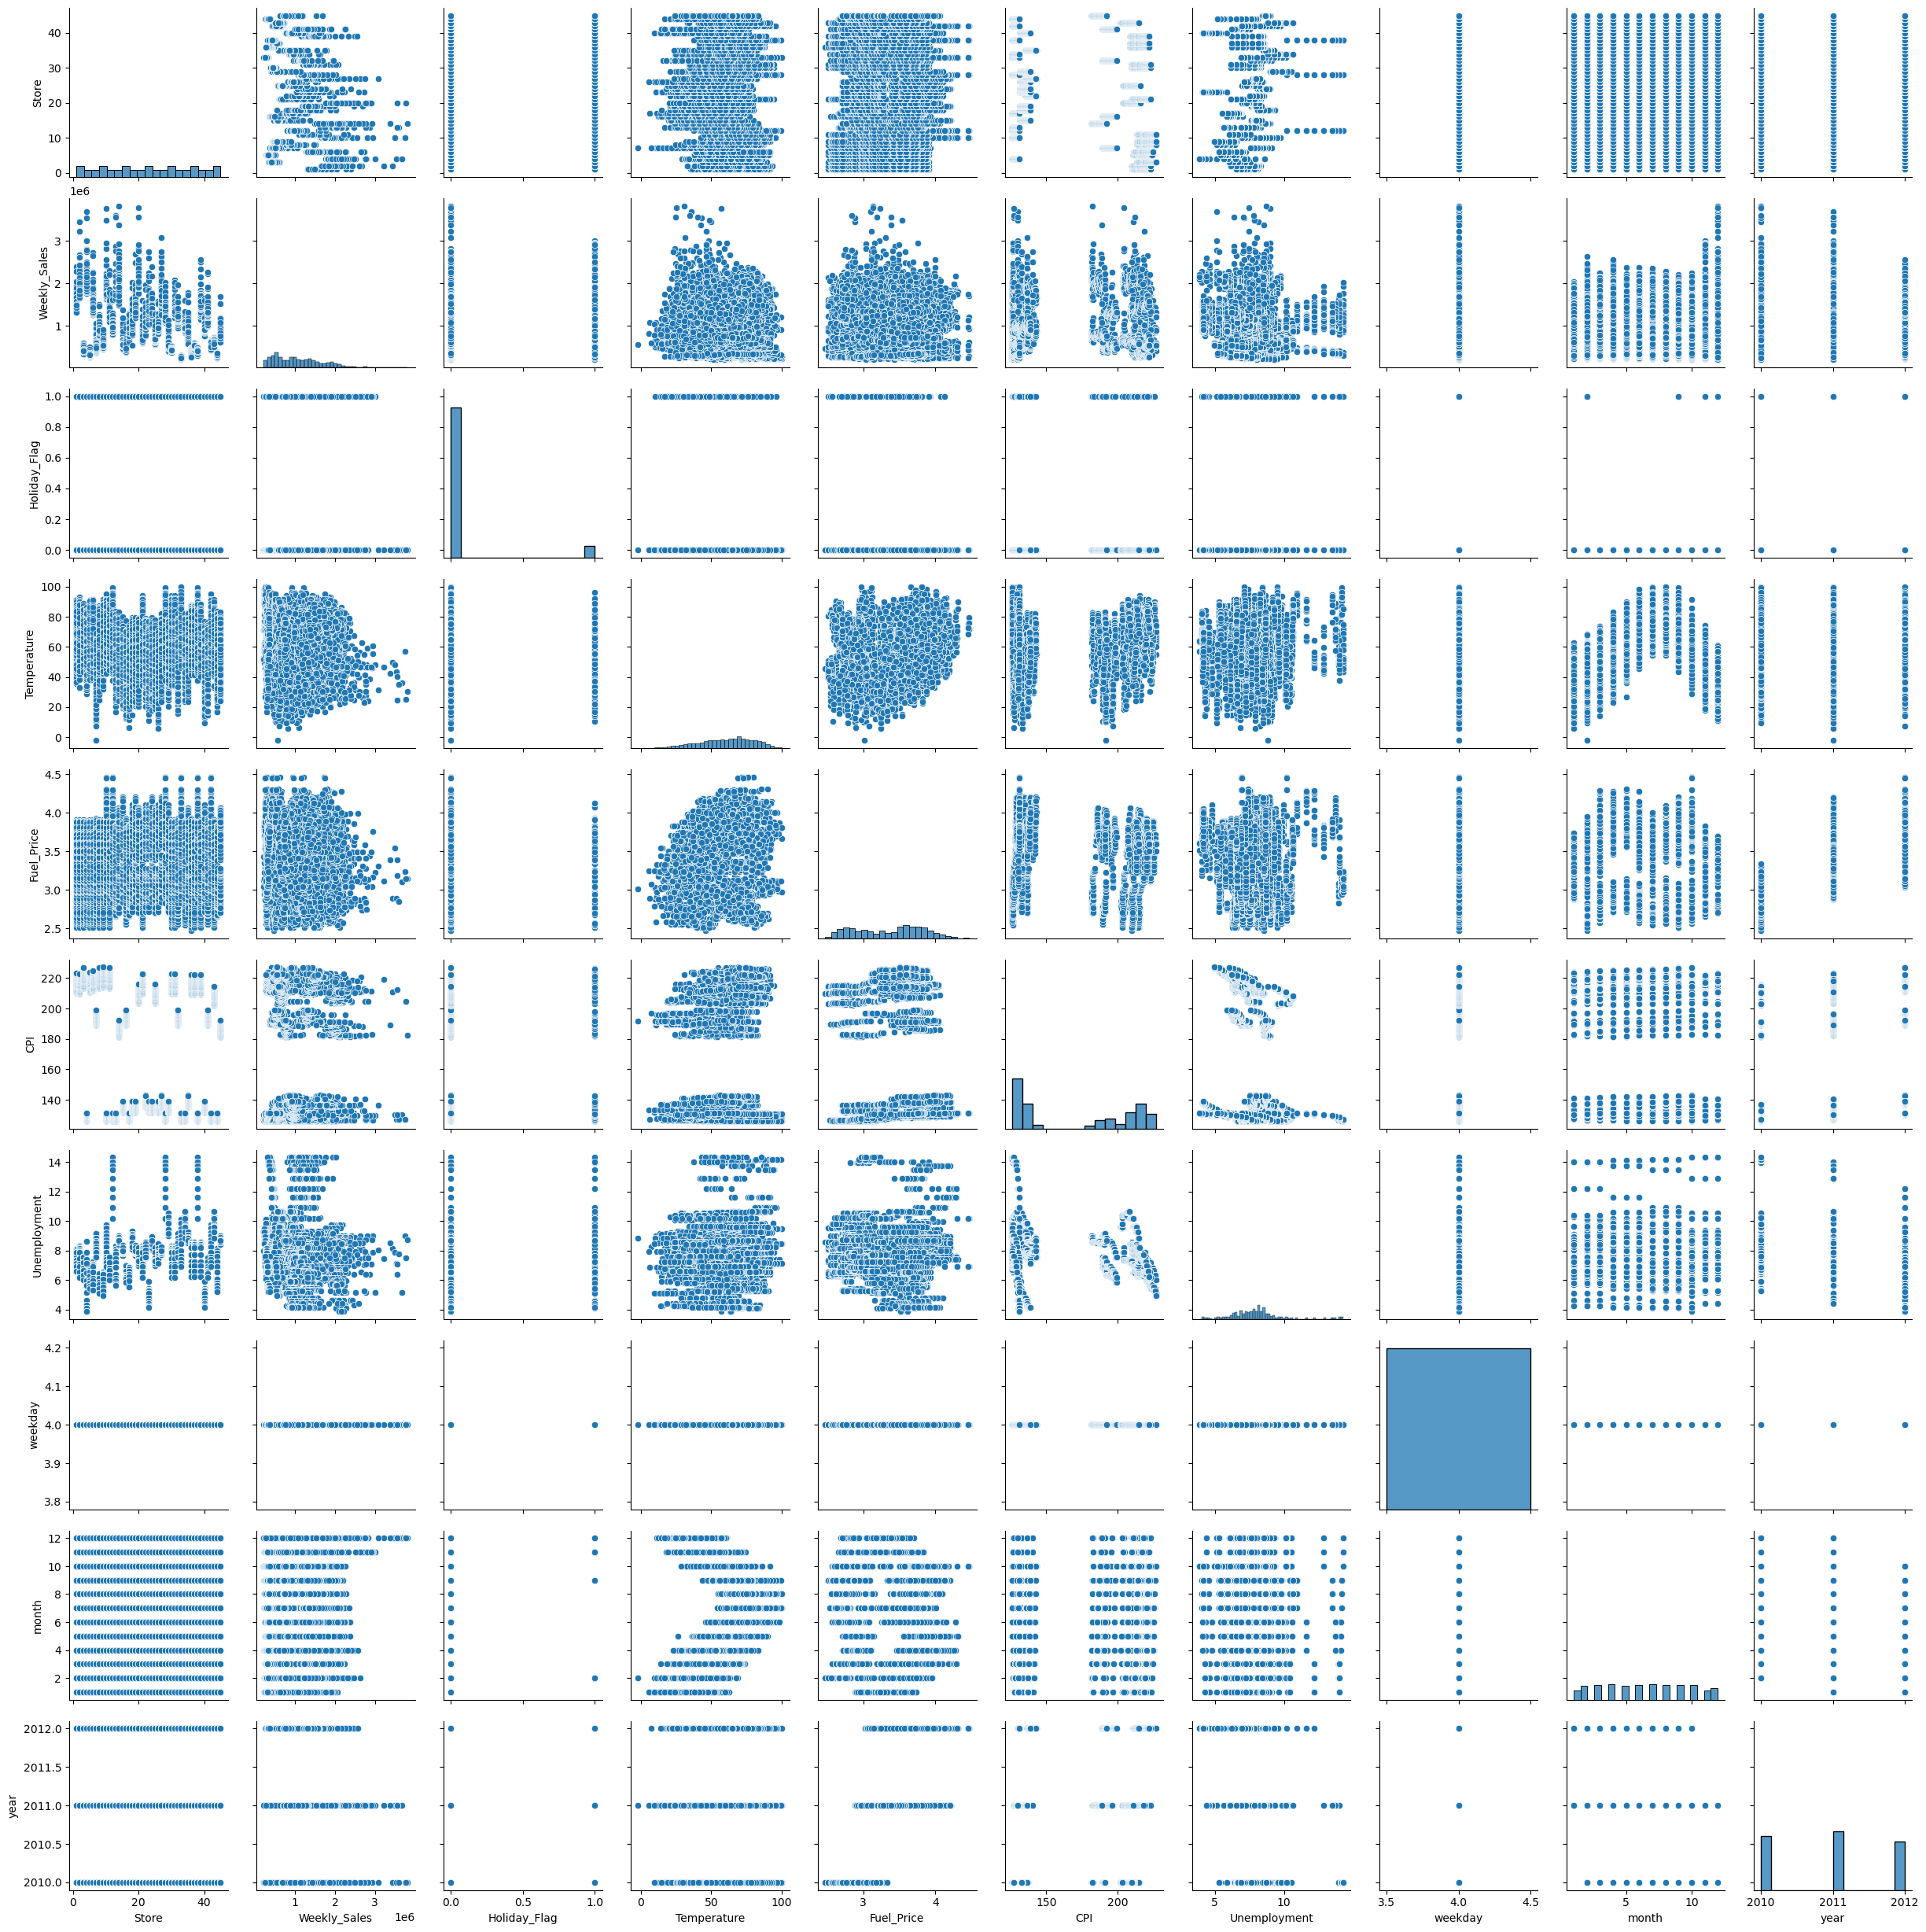

In [12]:
sns.pairplot(df)


# DATA PREPROCESSING

In [13]:
df.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
weekday         0
month           0
year            0
dtype: int64

there are no missing values present in the data set

# FEATURE SELECTION

In this data set all the features are important

In [14]:
x=df.drop('Weekly_Sales',axis=1)

In [15]:
y=df['Weekly_Sales']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

In [17]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(4504, 9) (4504,) (1931, 9) (1931,)


# PREDICTIVE MODELING

In [18]:
model=RandomForestRegressor()

In [19]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [20]:
mape_train=[]
mape_test=[]
model_name=[]
def model_validation(model,xtrain,ytrain,xtest,ytest):
    m= model
    m.fit(xtrain,ytrain)
    pred_h=m.predict(xtest)
    train_ypred=m.predict(xtrain)
    test_ypred=m.predict(xtest)
    print('training mean_absolute_percentage_error',mean_absolute_percentage_error(ytrain,train_ypred))
    print('testing mean_absolute_percentage_error',mean_absolute_percentage_error(ytest,test_ypred))
    
    resp=input('Do You Want To Keep This Model? Yes')
    if resp.lower()=='yes':
        model_name.append(str(m))
        mape_train.append(mean_absolute_percentage_error(ytrain,train_ypred))
        mape_test.append(mean_absolute_percentage_error(ytest,test_ypred))
        global df_score
        df_score=pd.DataFrame({'Model':model_name,'Training mean_absolute_percentage_error':mape_train,
                              'testing mean_absolute_percentage_error':mape_test})
        
        return m
    


# LINEAR REGRESSION

In [21]:
lr=model_validation(LinearRegression(),x_train,y_train,x_test,y_test)

training mean_absolute_percentage_error 0.6129519481498115
testing mean_absolute_percentage_error 0.5921073260166492
Do You Want To Keep This Model? Yesyes


# RIDGE REGRESSION

In [22]:
rr=model_validation(Ridge(),x_train,y_train,x_test,y_test)

training mean_absolute_percentage_error 0.6129520810285813
testing mean_absolute_percentage_error 0.5921078717621724
Do You Want To Keep This Model? Yesno


# LASSO REGRESSION

In [23]:
lasso_r=model_validation(Lasso(),x_train,y_train,x_test,y_test)

training mean_absolute_percentage_error 0.6129518469152722
testing mean_absolute_percentage_error 0.5921075990546586
Do You Want To Keep This Model? Yesno


# DECISION TREE

In [24]:
dt=model_validation(DecisionTreeRegressor(max_depth=5),x_train,y_train,x_test,y_test)

training mean_absolute_percentage_error 0.22344489571430096
testing mean_absolute_percentage_error 0.21138895119613121
Do You Want To Keep This Model? Yesyes


# Random Forest

In [25]:
rf=model_validation(RandomForestRegressor(criterion='absolute_error',max_depth=5),x_train,y_train,x_test,y_test)

training mean_absolute_percentage_error 0.17398108572331036
testing mean_absolute_percentage_error 0.17311405077882494
Do You Want To Keep This Model? Yesyes


# ADABOOST REGRESSOR 

In [26]:
adt=model_validation(AdaBoostRegressor(),x_train,y_train,x_test,y_test)

training mean_absolute_percentage_error 0.5582342375364773
testing mean_absolute_percentage_error 0.5402963416028944
Do You Want To Keep This Model? Yesno


# GRADIENT BOOTING REGRESSOR

In [27]:
adt=model_validation(GradientBoostingRegressor(loss='absolute_error'),x_train,y_train,x_test,y_test)

training mean_absolute_percentage_error 0.19038994943847654
testing mean_absolute_percentage_error 0.1788049442810316
Do You Want To Keep This Model? Yesyes


# XG BOOST REGRESSOR

In [32]:
xgb=model_validation(XGBRegressor(n_estimators=200,max_depth=7),x_train,y_train,x_test,y_test)

training mean_absolute_percentage_error 0.010474094148949478
testing mean_absolute_percentage_error 0.059184518598138114
Do You Want To Keep This Model? Yesyes


In [33]:
base_models = [('DT',DecisionTreeRegressor(max_depth=5)),
              ('RF',RandomForestRegressor(criterion='absolute_error',max_depth=5)),
              ('XGBoost',XGBRegressor(n_estimators=200,max_depth=7)),
              ('GB',GradientBoostingRegressor(loss='absolute_error'))] 


# VOTING

In [37]:
voting = model_validation(VotingRegressor(estimators=base_models),
                         x_train,y_train,x_test,y_test)

training mean_absolute_percentage_error 0.14209612157736662
testing mean_absolute_percentage_error 0.14095230273161655
Do You Want To Keep This Model? Yesyes


# STAKING

In [41]:
stack=model_validation(StackingRegressor(estimators=base_models,final_estimator=XGBRegressor(n_estimators=200,max_depth=7)),x_train,y_train,x_test,y_test)

training mean_absolute_percentage_error 0.04521953192941986
testing mean_absolute_percentage_error 0.0684151190652166
Do You Want To Keep This Model? Yesyes


In [42]:
df_score

,Model,Training mean_absolute_percentage_error,testing mean_absolute_percentage_error
0,LinearRegression(),0.612952,0.592107
1,DecisionTreeRegressor(max_depth=5),0.223445,0.211389
2,RandomForestRegressor(criterion='absolute_erro...,0.173981,0.173114
3,GradientBoostingRegressor(loss='absolute_error'),0.190390,0.178805
4,"XGBRegressor(base_score=None, booster=None, ca...",0.010474,0.059185
5,"VotingRegressor(estimators=[('DT', DecisionTre...",0.142096,0.140952
6,"StackingRegressor(estimators=[('DT', DecisionT...",0.045220,0.068415


# FINAL MODEL

In [50]:
final_model=model_validation(XGBRegressor(n_estimators=200,max_depth=7),x_train,y_train,x_test,y_test)

training mean_absolute_percentage_error 0.010474094148949478
testing mean_absolute_percentage_error 0.059184518598138114
Do You Want To Keep This Model? YesYES


# PREDICTIONS

In [51]:
x_test.head(1)

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
4079,29,0,75.2,3.827,135.783742,9.863,4,7,2011


In [53]:
final_model.predict(([[29,1,78,9.12,178.986,10.984,4,9,2043]]))[0]

694342.3

# SAVE THE FITTED MODEL

In [54]:
import pickle

In [55]:
with open('final_model.pkl','wb') as file:
    pickle.dump(final_model,file)